## Overview
  - Passengers flying into and out of Australia for each airline in each month of 2019
  - Last 6 months port country responsible for most passengers coming into the country
  - 3 month rolling average of freight arriving to Australia for each airline throughout 2018

1. Interactive notebook provided with any results and explanations included.
2. Uploaded to a GitHub repository. Repository publicly accessible and provide link

In [1]:
%matplotlib inline

from matplotlib import __version__ as plt_version
from matplotlib.collections import PolyCollection
from matplotlib import ticker, colors, cm
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import calendar

plt.style.use('ggplot')

url = "https://data.gov.au/data/dataset/ad89b4ff-541a-4729-b93c-4d2f5682e4c8/resource/809c77d8-fd68-4a2c-806f-c63d64e69842/download/airline_portcountry.csv"
f = pd.read_csv(url)

print("Aliasing flight data as 'f'")
print("Adding date column 'Year Month'")
print("Removing columns 'Month', 'Year' and 'Month_num'")
print('Flight data - first and last 5 rows')

f['Year Month'] = pd.to_datetime(f.Year.astype(str) + '-' + f.Month_num.astype(str))
f.drop(columns=['Month', 'Year', 'Month_num'], inplace=True)
f

Aliasing flight data as 'f'
Adding date column 'Year Month'
Removing columns 'Month', 'Year' and 'Month_num'
Flight data - first and last 5 rows


Airline   Port_Country  Passengers_In  \
0              Air Caledonie  New Caledonia          725.0   
1                  Air China          China         1311.0   
2                  Air India          India         1423.0   
3                  Air India      Singapore          501.0   
4                  Air Nauru          Nauru          161.0   
...                      ...            ...            ...   
43292  United Parcel Service          Korea            0.0   
43293  United Parcel Service      Singapore            0.0   
43294  United Parcel Service            USA            0.0   
43295       Vietnam Airlines        Vietnam          211.0   
43296        Xiamen Airlines          China          341.0   

       Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
0                    0.368             0.000           474.0   
1                    9.158             0.000          1232.0   
2                   44.823             0.000           970.0   
3                   10.583             0.000           306.0   
4                    0.212             0.000            96.0   
...                    ...               ...             ...   
43292                0.000             0.000             0.0   
43293                0.000             0.000             0.0   
43294             1736.977             0.000             0.0   
43295              423.980             1.098             0.0   
43296              189.800             4.200           748.0   

       Freight_Out_(tonnes)  Mail_Out_(tonnes) Year Month  
0                     0.167              0.000 1985-01-01  
1                     2.587              0.000 1985-01-01  
2                     6.708              0.000 1985-01-01  
3                   124.966              0.000 1985-01-01  
4                    23.996              0.000 1985-01-01  
...                     ...                ...        ...  
43292               363.203              0.000 2021-04-01  
43293                36.215              0.000 2021-04-01  
43294                 0.000              0.000 2021-04-01  
43295               280.103              3.807 2021-04-01  
43296               137.510              0.000 2021-04-01  

[43297 rows x 9 columns]

# Passengers flying into and out of Australia for each airline in each month of 2019

In [ ]:
# Group by Year Month and Airline, and sum the passengers in & out
f19 = f.loc[f['Year Month'].dt.year==2019].copy(deep=True)
year_months = f19['Year Month'].drop_duplicates().sort_values()
pax_in = pd.Series(f19.groupby(['Airline','Year Month']).Passengers_In.sum().astype(int), name='Passengers In')
pax_out = pd.Series(f19.groupby(['Airline','Year Month']).Passengers_Out.sum().astype(int), name='Passengers Out')
monthly_pax = pd.concat([pax_in, pax_out], axis=1).reset_index()

print("Dropping month data for airlines with no passenger movement:",
      monthly_pax.loc[(monthly_pax['Passengers In']==0) & (monthly_pax['Passengers Out']==0), 'Airline'].unique())
monthly_pax = monthly_pax.loc[(monthly_pax['Passengers In']>0) & (monthly_pax['Passengers Out']>0)]

monthly_airline_data = pd.DataFrame()

# Loop through each airline's year month data
for airline in monthly_pax['Airline'].unique():
    
    airline_subset = monthly_pax.loc[monthly_pax['Airline']==airline].set_index('Year Month')
    if len(airline_subset) < 12:
        print("Airline %s has missing months. Adding month filled with 0 for number of passengers" % airline)
        filled_month_data_df = pd.DataFrame(columns=['Passengers Out', 'Passengers In'], index=year_months).fillna(0)
        filled_month_data_df.loc[airline_subset.index] = airline_subset[['Passengers Out', 'Passengers In']]
        filled_month_data_df['Airline'] = airline
        airline_subset = filled_month_data_df[['Airline', 'Passengers In', 'Passengers Out']].sort_index()
        
    monthly_airline_data = pd.concat([monthly_airline_data, airline_subset])
        
monthly_airline_data = monthly_airline_data.reset_index()
monthly_airline_data['Month Num'] = monthly_airline_data['Year Month'].dt.month
monthly_airline_data['Year Month'] = monthly_airline_data['Year Month'].dt.month_name()
monthly_airline_data = monthly_airline_data.rename(columns={'Year Month': 'Month'})

monthly_airline_data_movement_sorted = monthly_airline_data.copy(deep=True)
airlines = monthly_airline_data_movement_sorted['Airline'].unique()
for airline in airlines:
  airline_subset = monthly_airline_data.loc[monthly_airline_data['Airline']==airline].copy(deep=True)
  total_in = airline_subset['Passengers In'].sum()
  total_out = airline_subset['Passengers Out'].sum()
  monthly_airline_data_movement_sorted.loc[airline_subset.index, 'Airline Total Movement'] = total_in + total_out
monthly_airline_data_movement_sorted = monthly_airline_data_movement_sorted.sort_values(by=['Airline Total Movement', 'Month Num'], ascending=[False, True]).reset_index(drop=True)
monthly_airline_data_movement_sorted = monthly_airline_data_movement_sorted[['Airline', 'Month', 'Passengers In', 'Passengers Out']]

Dropping month data for airlines with no passenger movement: ['Federal Express Corporation' 'Pacific Air Express' 'Polar Air Cargo'
 'Tasman Cargo Airlines' 'United Parcel Service']
Airline Air Chathams has missing months. Adding month filled with 0 for number of passengers
Airline Citilink Indonesia has missing months. Adding month filled with 0 for number of passengers
Airline Thai AirAsia X has missing months. Adding month filled with 0 for number of passengers


## Show graphs in shared axis to compare airline volumes with each other

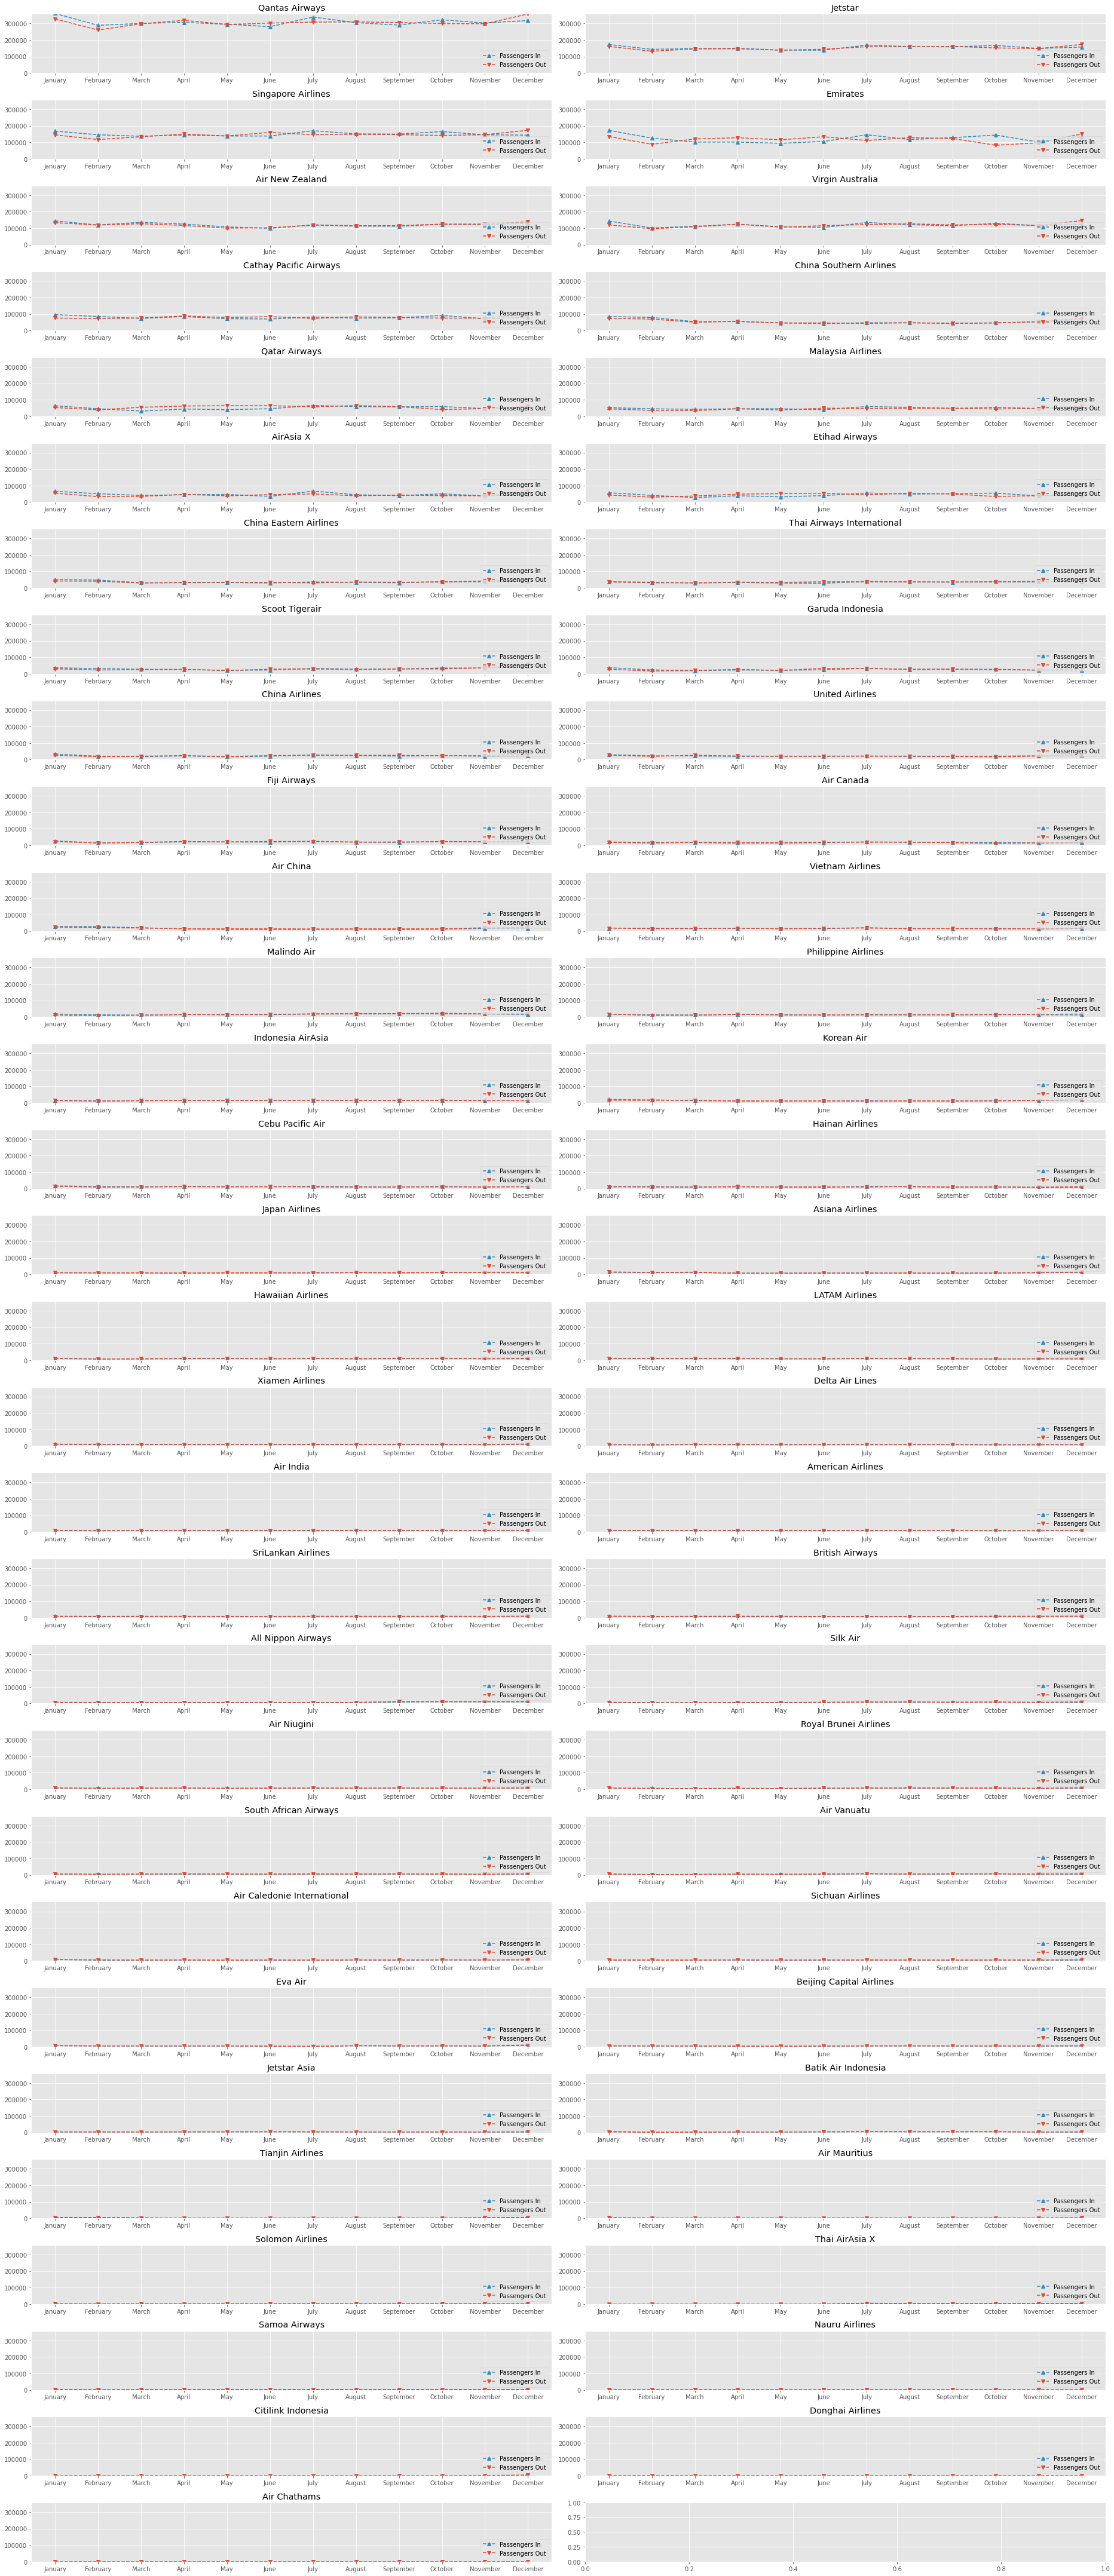

In [ ]:
nrows=30
ncols=2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(13*ncols, 2*nrows))
min_val = min([monthly_airline_data_movement_sorted['Passengers In'].min(), monthly_airline_data_movement_sorted['Passengers Out'].min()])
max_val = min([monthly_airline_data_movement_sorted['Passengers In'].max(), monthly_airline_data_movement_sorted['Passengers Out'].max()])
row, column = 0, 0
for airline in monthly_airline_data_movement_sorted['Airline'].unique():
  subset = monthly_airline_data.loc[monthly_airline_data['Airline']==airline].copy(deep=True)
  
  if column==0:
    axis   = ax[row][0]
    column = 1
  elif column==1:
    axis   = ax[row][1]
    column = 0
    row   += 1
  
  blues = axis.plot(subset['Month'], subset['Passengers In'], color = '#348ABD', label = 'Passengers In', marker='^', linestyle='dashed')
  reds = axis.plot(subset['Month'], subset['Passengers Out'], color = '#E24A33', label = 'Passenger Out', marker='v', linestyle='dashed')
  axis.legend([blues[0], reds[0]], ['Passengers In','Passengers Out'], loc="lower right")
  axis.title.set_text(airline)
  axis.set_ylim(min_val, max_val)

fig.tight_layout()

## Show graph in respective axis to show airline's individual trend

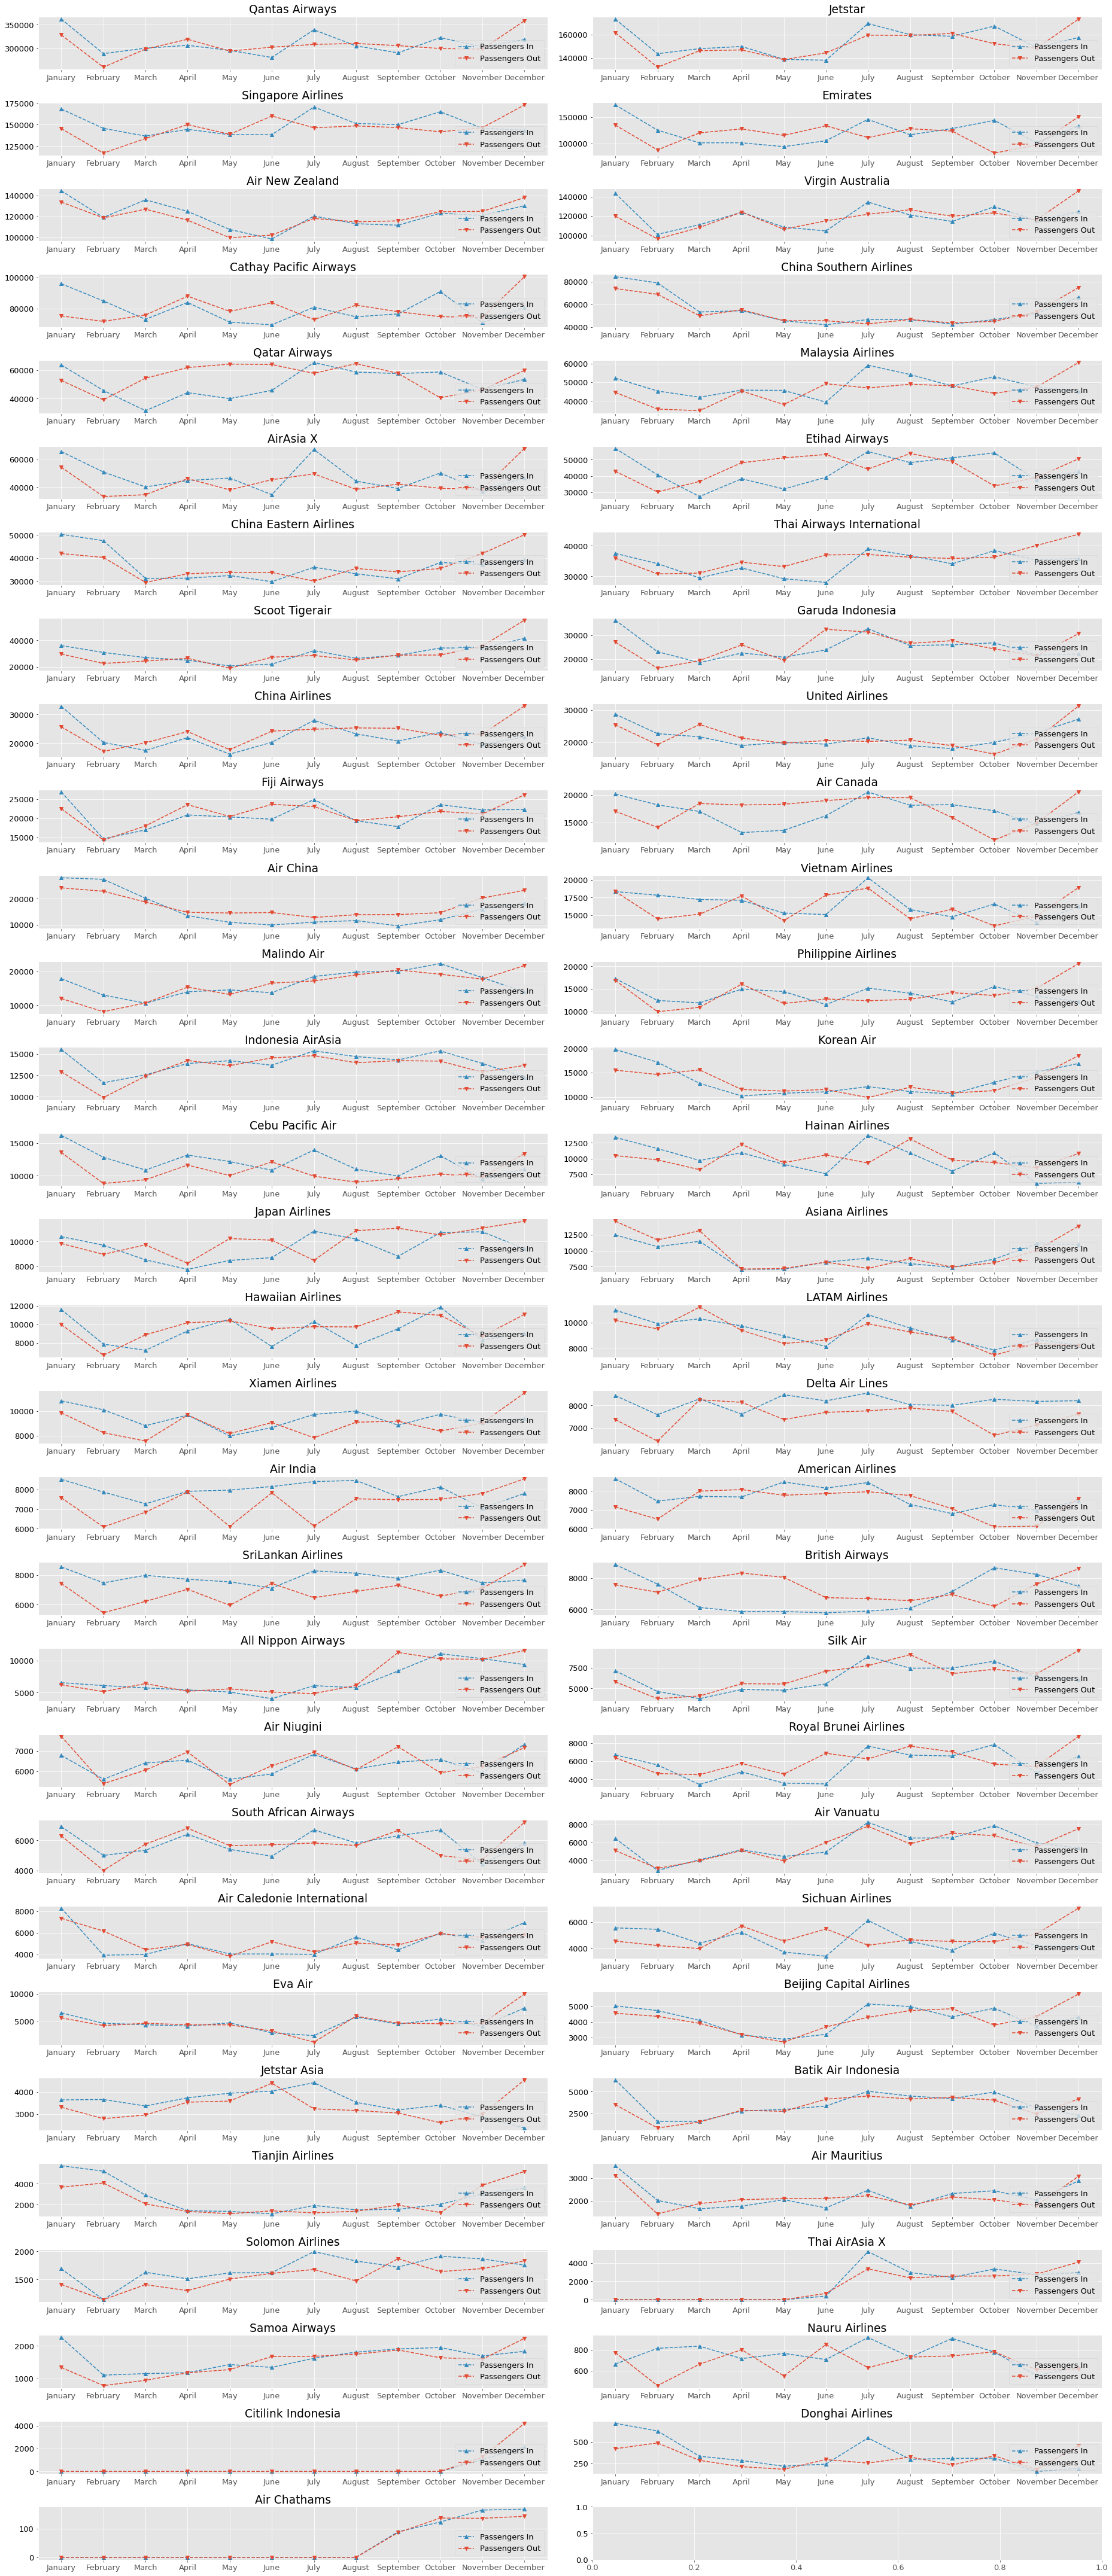

In [17]:
nrows=30
ncols=2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(13*ncols, 2*nrows))
min_val = min([monthly_airline_data_movement_sorted['Passengers In'].min(), monthly_airline_data_movement_sorted['Passengers Out'].min()])
max_val = min([monthly_airline_data_movement_sorted['Passengers In'].max(), monthly_airline_data_movement_sorted['Passengers Out'].max()])
row, column = 0, 0
for airline in monthly_airline_data_movement_sorted['Airline'].unique():
  subset = monthly_airline_data.loc[monthly_airline_data['Airline']==airline].copy(deep=True)
  
  if column==0:
    axis   = ax[row][0]
    column = 1
  elif column==1:
    axis   = ax[row][1]
    column = 0
    row   += 1
  
  blues = axis.plot(subset['Month'], subset['Passengers In'], color = '#348ABD', label = 'Passengers In', marker='^', linestyle='dashed')
  reds = axis.plot(subset['Month'], subset['Passengers Out'], color = '#E24A33', label = 'Passenger Out', marker='v', linestyle='dashed')
  axis.legend([blues[0], reds[0]], ['Passengers In','Passengers Out'], loc="lower right")
  axis.title.set_text(airline)

fig.tight_layout()

In [ ]:
print("Show raw data for top 50 rows")
monthly_airline_data_movement_sorted.head(50)

Show raw data for top 50 rows


Airline      Month  Passengers In  Passengers Out
0       Qantas Airways    January         361673          328363
1       Qantas Airways   February         289261          260729
2       Qantas Airways      March         300687          298800
3       Qantas Airways      April         306564          319292
4       Qantas Airways        May         296092          294663
5       Qantas Airways       June         281172          302677
6       Qantas Airways       July         339264          308595
7       Qantas Airways     August         305397          310526
8       Qantas Airways  September         290880          306017
9       Qantas Airways    October         322813          299862
10      Qantas Airways   November         303377          298822
11      Qantas Airways   December         318509          358093
12             Jetstar    January         173290          161665
13             Jetstar   February         143772          132168
14             Jetstar      March         148059          146319
15             Jetstar      April         149934          146970
16             Jetstar        May         138962          138661
17             Jetstar       June         138158          144458
18             Jetstar       July         169580          159634
19             Jetstar     August         160071          159405
20             Jetstar  September         158667          161114
21             Jetstar    October         167420          152287
22             Jetstar   November         149024          148408
23             Jetstar   December         157645          173411
24  Singapore Airlines    January         168246          145467
25  Singapore Airlines   February         145765          117067
26  Singapore Airlines      March         136824          133947
27  Singapore Airlines      April         144605          150160
28  Singapore Airlines        May         138414          138862
29  Singapore Airlines       June         138426          160142
30  Singapore Airlines       July         170605          146399
31  Singapore Airlines     August         151355          148586
32  Singapore Airlines  September         150069          146679
33  Singapore Airlines    October         165042          141769
34  Singapore Airlines   November         145818          146466
35  Singapore Airlines   December         143594          172933
36            Emirates    January         173150          135101
37            Emirates   February         125534           88192
38            Emirates      March         101540          120468
39            Emirates      April         101614          127882
40            Emirates        May          94419          115627
41            Emirates       June         105525          133714
42            Emirates       July         145940          111550
43            Emirates     August         116802          128224
44            Emirates  September         128559          123760
45            Emirates    October         144069           82236
46            Emirates   November         101890           97339
47            Emirates   December         133280          150758
48     Air New Zealand    January         144286          133584
49     Air New Zealand   February         119061          118649

In [ ]:
print("Show raw data for bottom 50 rows")
monthly_airline_data_movement_sorted.tail(50)

Show raw data for bottom 50 rows


Airline      Month  Passengers In  Passengers Out
658       Samoa Airways   November           1688            1587
659       Samoa Airways   December           1831            2231
660      Nauru Airlines    January            664             771
661      Nauru Airlines   February            812             461
662      Nauru Airlines      March            832             663
663      Nauru Airlines      April            715             799
664      Nauru Airlines        May            764             552
665      Nauru Airlines       June            706             847
666      Nauru Airlines       July            914             630
667      Nauru Airlines     August            729             730
668      Nauru Airlines  September            905             740
669      Nauru Airlines    October            776             779
670      Nauru Airlines   November            557             610
671      Nauru Airlines   December            634             617
672  Citilink Indonesia    January              0               0
673  Citilink Indonesia   February              0               0
674  Citilink Indonesia      March              0               0
675  Citilink Indonesia      April              0               0
676  Citilink Indonesia        May              0               0
677  Citilink Indonesia       June              0               0
678  Citilink Indonesia       July              0               0
679  Citilink Indonesia     August              0               0
680  Citilink Indonesia  September              0               0
681  Citilink Indonesia    October              0               0
682  Citilink Indonesia   November           1043            1248
683  Citilink Indonesia   December           2142            4226
684    Donghai Airlines    January            720             421
685    Donghai Airlines   February            630             489
686    Donghai Airlines      March            332             283
687    Donghai Airlines      April            282             209
688    Donghai Airlines        May            215             179
689    Donghai Airlines       June            240             293
690    Donghai Airlines       July            548             251
691    Donghai Airlines     August            296             323
692    Donghai Airlines  September            307             230
693    Donghai Airlines    October            309             337
694    Donghai Airlines   November            153             176
695    Donghai Airlines   December            190             458
696        Air Chathams    January              0               0
697        Air Chathams   February              0               0
698        Air Chathams      March              0               0
699        Air Chathams      April              0               0
700        Air Chathams        May              0               0
701        Air Chathams       June              0               0
702        Air Chathams       July              0               0
703        Air Chathams     August              0               0
704        Air Chathams  September             90              87
705        Air Chathams    October            124             138
706        Air Chathams   November            166             137
707        Air Chathams   December            169             144

In [ ]:
f19 = f.loc[f['Year Month'].dt.year==2019].copy(deep=True)
pax_in = pd.Series(f19.groupby('Year Month').Passengers_In.sum().astype(int), name='Passengers In')
pax_out = pd.Series(f19.groupby('Year Month').Passengers_Out.sum().astype(int), name='Passengers Out')
months = pd.Series(pax_in.index, index=pax_in.index, name='Month').dt.month_name()

monthly_pax = pd.concat([months, pax_out, pax_in], axis=1)
monthly_pax = monthly_pax.set_index('Month')

## Show passenger movement for all airlines aggregated

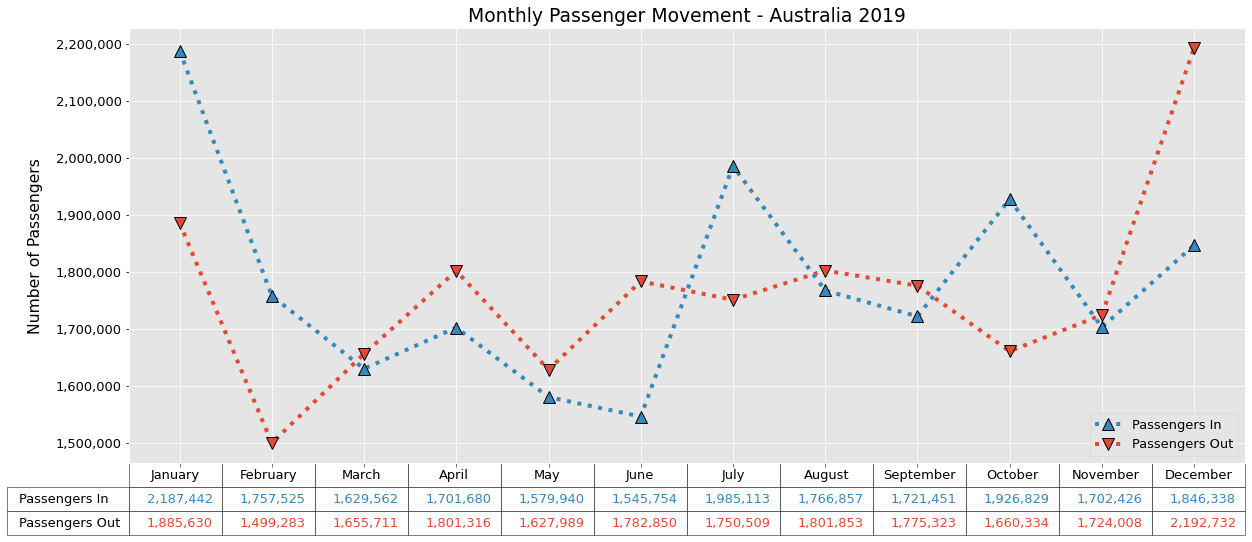

In [ ]:
plt.rcParams.update({'font.size': 13,
                        'axes.labelcolor':'black', 
                        'axes.labelpad':13,
                        'ytick.color':'black'})

plot_table = pd.DataFrame([monthly_pax['Passengers In'].map('{:,}'.format),
                           monthly_pax['Passengers Out'].map('{:,}'.format)])

plot = monthly_pax.plot(title="Monthly Passenger Movement - Australia 2019",
                        figsize=(20, 8), table=plot_table, linewidth=4,
                        xticks=range(0,12), ms=12, markeredgecolor='black',
                        style={'Passengers In':':^', 'Passengers Out':':v'}, legend='reverse')
plot.set_ylabel('Number of Passengers')
plot.set_xlabel('')
plot.tick_params(labelbottom=False)

# Add comma to number to separate thousands (for example 1,000,000)
plot.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Bottom table formatting
table = plot.tables[0]
table.scale(1, 2)
for column in range(0,12):
    table.get_celld()[1, column].set_text_props(color='#348ABD')
    table.get_celld()[2, column].set_text_props(color='#E24A33')

# 2. Last 6 months port country responsible for most passengers coming into the country

In [ ]:
f_6mos_df = f.loc[
    # Use last date in the dataset to get last 6 months
    f['Year Month'] > 
    # Get last 6 complete months by going from the first of the month
    (f['Year Month'].max() - pd.DateOffset(months=6)).replace(day=1) 
].copy(deep=True)
f_6mos = pd.Series(f_6mos_df.groupby(['Port_Country']).Passengers_In.sum().sort_values(ascending=False).astype(int), name='Passengers In').head(10)
f_6mos.index.name = 'Port Country'

# Display passengers inbound (top 10 countries) - adding comma for thousands separator
pd.DataFrame(f_6mos.map('{:,}'.format)).T

Port Country  New Zealand Singapore   Qatar United Arab Emirates     USA  \
Passengers In      58,998    34,071  25,286               17,131  14,495   

Port Country  Papua New Guinea  Japan Hong Kong (SAR)  China Indonesia  
Passengers In            5,694  5,291           4,249  4,201     3,106

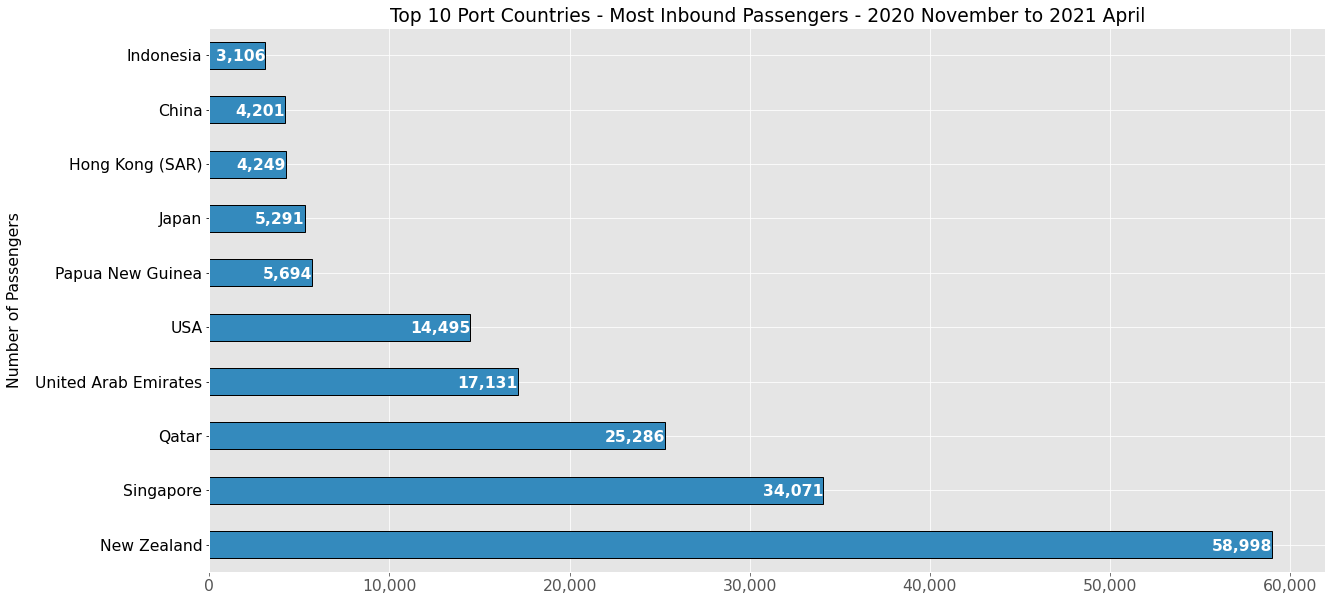

In [ ]:
title = 'Top 10 Port Countries - Most Inbound Passengers - %s %s to %s %s' % (f_6mos_df['Year Month'].min().year, f_6mos_df['Year Month'].min().month_name(), f_6mos_df['Year Month'].max().year, f_6mos_df['Year Month'].max().month_name())
plot = f_6mos.plot(
  title=title, kind='barh',figsize=(20,10),
  color = '#348ABD', linewidth=1, edgecolor = 'black', fontsize='large'
)
plot.set_ylabel('Number of Passengers')
# Bar labels
for i, v in enumerate(f_6mos):
    plot.text(v, range(0,15)[i], "{:,}".format(v), ha='right', va='center_baseline', color='white', weight='bold', size='large')

# Add thousands comma separator to x axis
plot.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 3. Rolling average (3 months) of freight arriving to Australia for each airline throughout 2018

In [ ]:
first_month = dt.datetime(2017,11,1)
last_month = dt.datetime(2018,12,31)
f18 = f.loc[(f['Year Month'] >= first_month) & (f['Year Month'] <= last_month)].copy(deep=True)
year_months = f18['Year Month'].drop_duplicates().sort_values()
f18_freight = f18.groupby(['Airline', 'Year Month'])['Freight_In_(tonnes)'].sum().reset_index()

print("Dropping month data for airlines with no freight movement:",
      f18_freight.loc[f18_freight['Freight_In_(tonnes)']==0, 'Airline'].unique())
f18_freight = f18_freight.loc[f18_freight['Freight_In_(tonnes)']>0]

monthly_f18_freight = pd.DataFrame()

# Loop through each airline's year month data
for airline in f18_freight['Airline'].unique():
    
    airline_subset = f18_freight.loc[f18_freight['Airline']==airline].set_index('Year Month')
    if len(airline_subset) < 12:
        print("Airline %s has missing months. Adding month filled with 0 for number of passengers" % airline)
        filled_month_data_df = pd.DataFrame(columns=['Freight_In_(tonnes)'], index=year_months).fillna(0)
        filled_month_data_df.loc[airline_subset.index] = airline_subset[['Freight_In_(tonnes)']]
        filled_month_data_df['Airline'] = airline
        airline_subset = filled_month_data_df[['Airline','Freight_In_(tonnes)']].sort_index()
        
    monthly_f18_freight = pd.concat([monthly_f18_freight, airline_subset])
        
monthly_f18_freight = monthly_f18_freight.reset_index()
monthly_f18_freight = monthly_f18_freight.rename(columns={'Year Month': 'Month'})

# Add 3 month rolling average
for airline in monthly_f18_freight['Airline'].unique():
  freight_airline_subset = monthly_f18_freight.loc[monthly_f18_freight['Airline']==airline].copy(deep=True)
  freight_airline_subset['Freight In (tonnes) - Rolling 3 Month Average'] = freight_airline_subset[['Freight_In_(tonnes)']].rolling(3, min_periods=3).mean().round(3)
  monthly_f18_freight.loc[freight_airline_subset.index, 'Freight In (tonnes) - Rolling 3 Month Average'] = freight_airline_subset[['Freight In (tonnes) - Rolling 3 Month Average']]
monthly_f18_freight = monthly_f18_freight.dropna()
monthly_f18_freight['Month Num'] = monthly_f18_freight['Month'].dt.month

Dropping month data for airlines with no freight movement: ['Batik Air Indonesia' 'Donghai Airlines' 'Jin Air' 'Malindo Air'
 'Pacific Air Express' 'Samoa Airways']
Airline Donghai Airlines has missing months. Adding month filled with 0 for number of passengers
Airline Malindo Air has missing months. Adding month filled with 0 for number of passengers
Airline Samoa Airways has missing months. Adding month filled with 0 for number of passengers
Airline Virgin Samoa has missing months. Adding month filled with 0 for number of passengers


## Show graphs in shared axis to compare airline volumes with each other

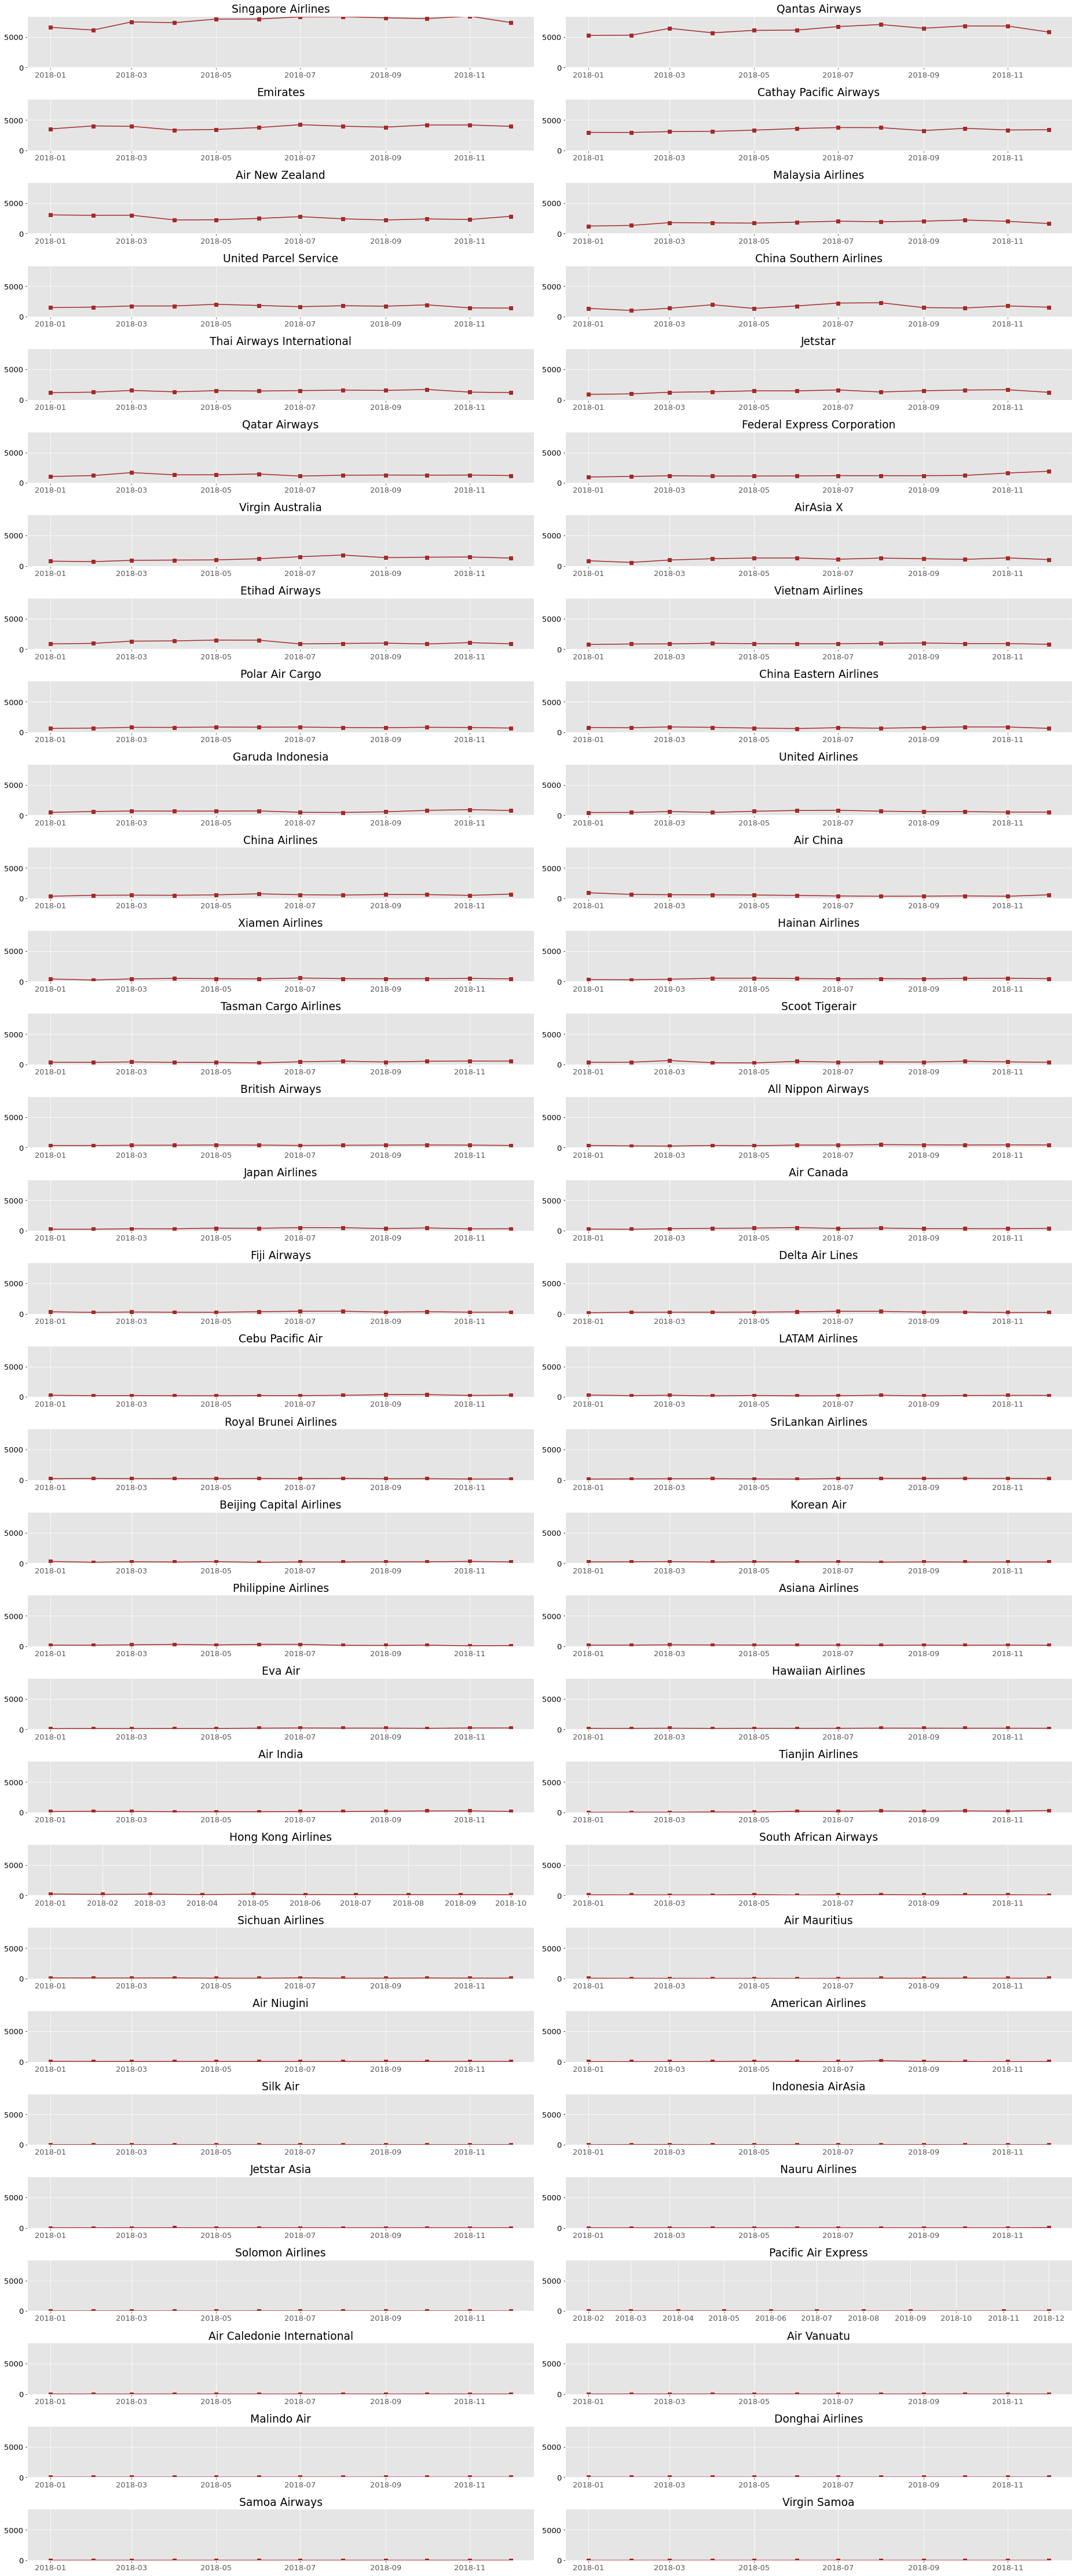

In [ ]:
monthly_airline_data_freight_sorted = monthly_f18_freight.copy(deep=True)
airlines = monthly_airline_data_freight_sorted['Airline'].unique()
for airline in airlines:
  airline_subset = monthly_f18_freight.loc[monthly_f18_freight['Airline']==airline].copy(deep=True)
  monthly_airline_data_freight_sorted.loc[airline_subset.index, 'Airline Total Movement'] = airline_subset['Freight_In_(tonnes)'].sum()
monthly_airline_data_freight_sorted = monthly_airline_data_freight_sorted.sort_values(by=['Airline Total Movement', 'Month Num'], ascending=[False, True]).reset_index(drop=True)
monthly_airline_data_freight_sorted = monthly_airline_data_freight_sorted[['Airline', 'Month', 'Freight_In_(tonnes)', 'Freight In (tonnes) - Rolling 3 Month Average']]

nrows=31
ncols=2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(13*ncols, 2*nrows))
min_val = monthly_airline_data_freight_sorted['Freight_In_(tonnes)'].min()
max_val = monthly_airline_data_freight_sorted['Freight_In_(tonnes)'].max()
row, column = 0, 0
for airline in monthly_airline_data_freight_sorted['Airline'].unique():
  subset = monthly_airline_data_freight_sorted.loc[monthly_airline_data_freight_sorted['Airline']==airline].copy(deep=True)
  
  if column==0:
    axis   = ax[row][0]
    column = 1
  elif column==1:
    axis   = ax[row][1]
    column = 0
    row   += 1
  
  blues = axis.plot(subset['Month'], subset['Freight_In_(tonnes)'], color = 'brown', marker='s', linestyle='solid')
  axis.title.set_text(airline)
  axis.set_ylim(min_val, max_val)

fig.tight_layout()

## Show graph in respective axis to show airline's individual trend

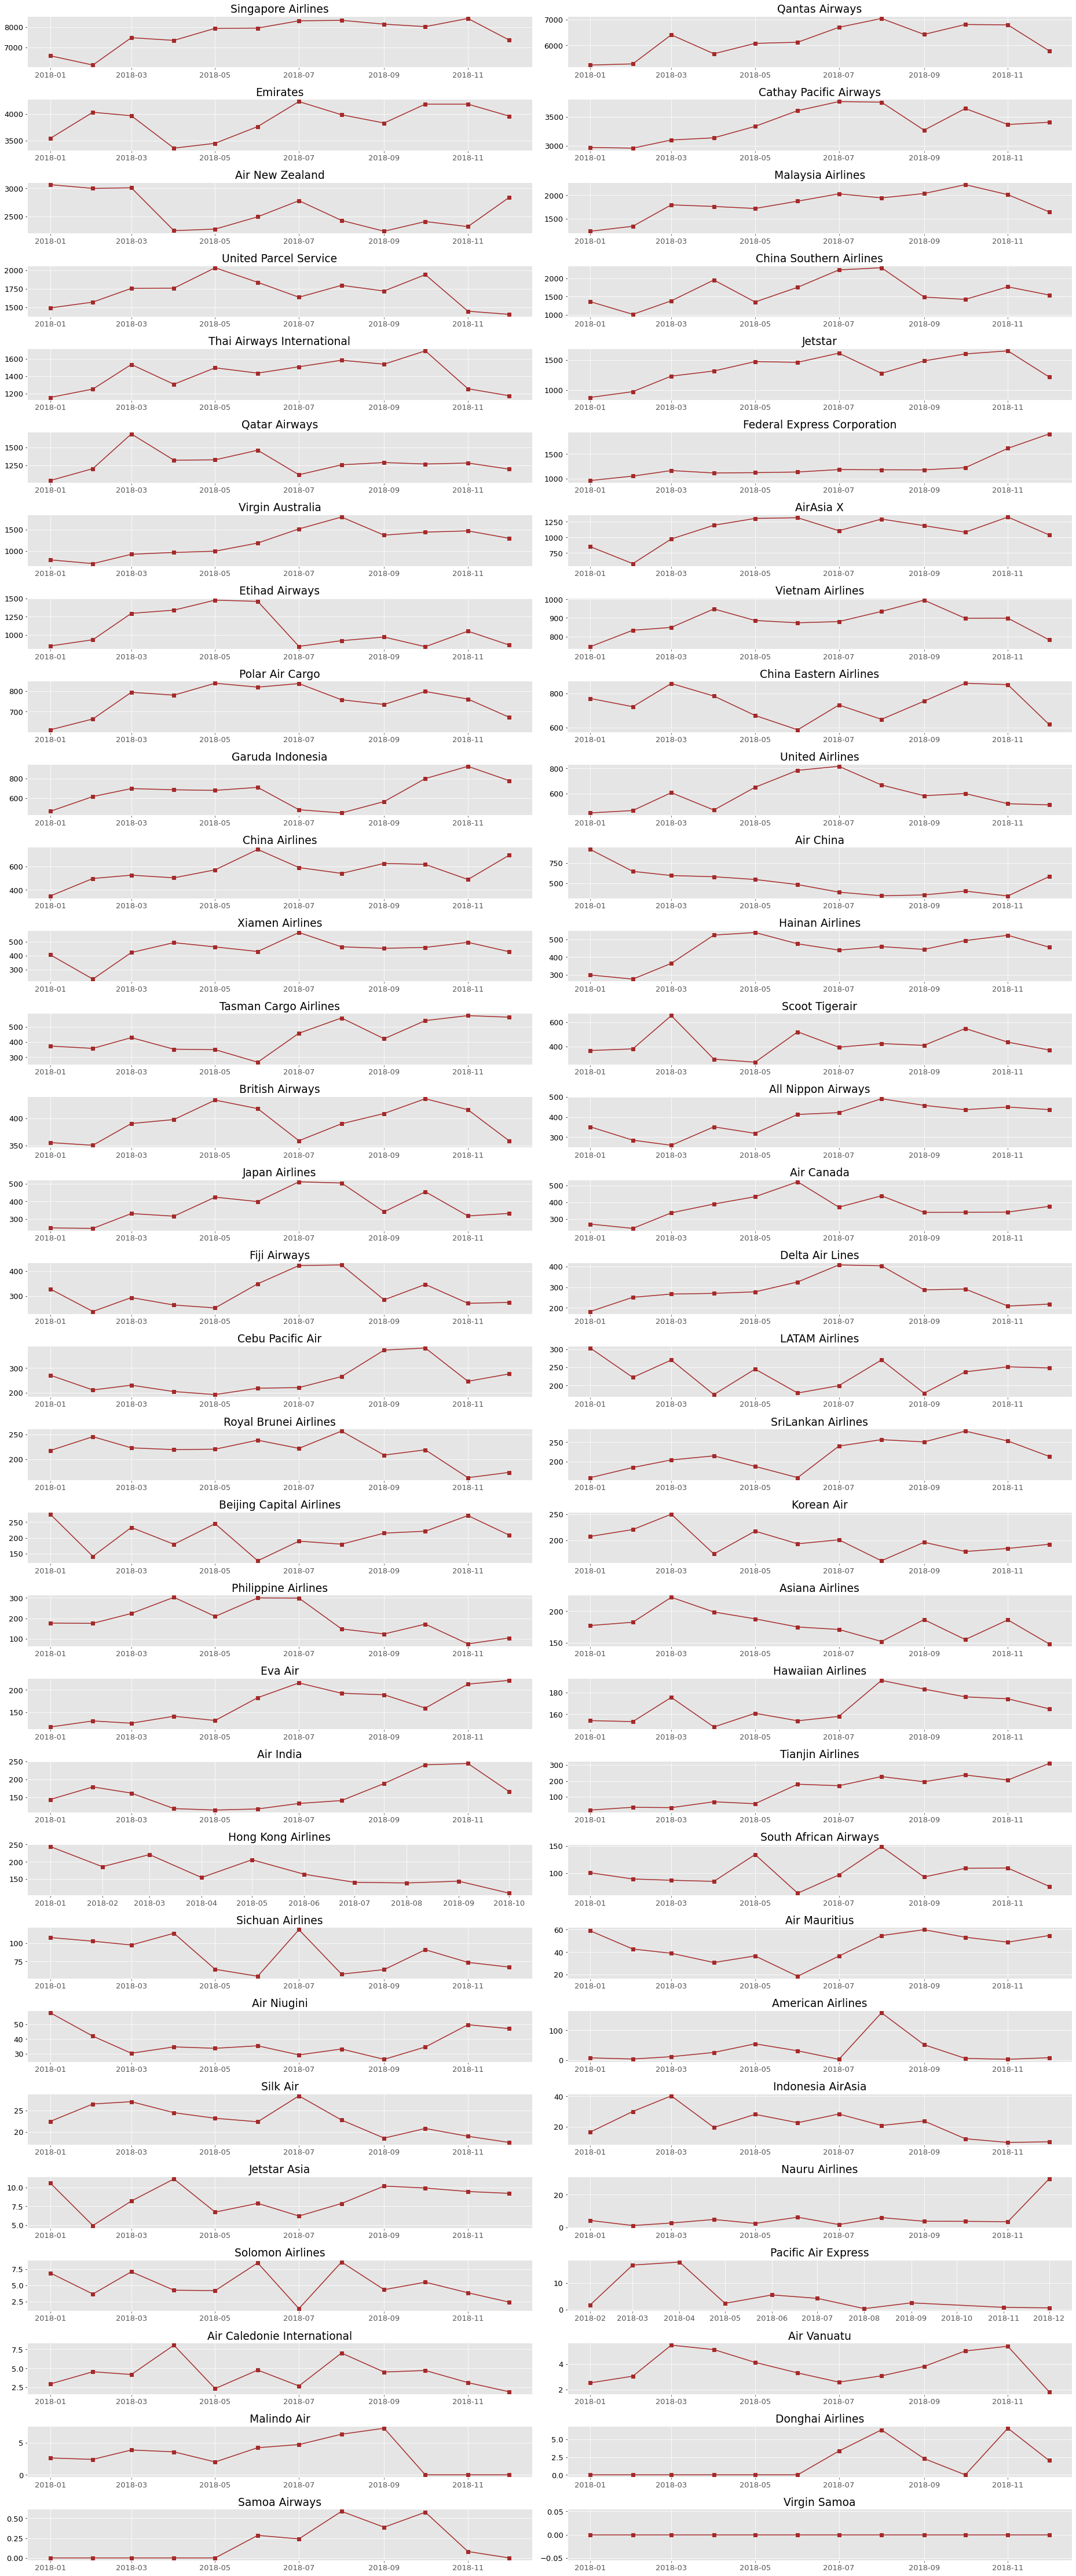

In [ ]:
nrows=31
ncols=2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(13*ncols, 2*nrows))
min_val = monthly_airline_data_freight_sorted['Freight_In_(tonnes)'].min()
max_val = monthly_airline_data_freight_sorted['Freight_In_(tonnes)'].max()
row, column = 0, 0
for airline in monthly_airline_data_freight_sorted['Airline'].unique():
  subset = monthly_airline_data_freight_sorted.loc[monthly_airline_data_freight_sorted['Airline']==airline].copy(deep=True)
  
  if column==0:
    axis   = ax[row][0]
    column = 1
  elif column==1:
    axis   = ax[row][1]
    column = 0
    row   += 1
  
  blues = axis.plot(subset['Month'], subset['Freight_In_(tonnes)'], color = 'brown', marker='s', linestyle='solid')
  axis.title.set_text(airline)

fig.tight_layout()

In [ ]:
print("Show raw data for top 50 rows")
monthly_airline_data_freight_sorted.head(50)

Show raw data for top 50 rows


Airline      Month  Freight_In_(tonnes)  \
0       Singapore Airlines 2018-01-01             6585.676   
1       Singapore Airlines 2018-02-01             6130.333   
2       Singapore Airlines 2018-03-01             7473.498   
3       Singapore Airlines 2018-04-01             7340.533   
4       Singapore Airlines 2018-05-01             7932.409   
5       Singapore Airlines 2018-06-01             7943.976   
6       Singapore Airlines 2018-07-01             8301.101   
7       Singapore Airlines 2018-08-01             8325.136   
8       Singapore Airlines 2018-09-01             8137.798   
9       Singapore Airlines 2018-10-01             8015.533   
10      Singapore Airlines 2018-11-01             8416.413   
11      Singapore Airlines 2018-12-01             7358.667   
12          Qantas Airways 2018-01-01             5242.937   
13          Qantas Airways 2018-02-01             5287.554   
14          Qantas Airways 2018-03-01             6408.251   
15          Qantas Airways 2018-04-01             5678.918   
16          Qantas Airways 2018-05-01             6078.607   
17          Qantas Airways 2018-06-01             6122.383   
18          Qantas Airways 2018-07-01             6697.569   
19          Qantas Airways 2018-08-01             7039.260   
20          Qantas Airways 2018-09-01             6424.328   
21          Qantas Airways 2018-10-01             6806.280   
22          Qantas Airways 2018-11-01             6792.456   
23          Qantas Airways 2018-12-01             5793.261   
24                Emirates 2018-01-01             3541.808   
25                Emirates 2018-02-01             4033.288   
26                Emirates 2018-03-01             3968.001   
27                Emirates 2018-04-01             3358.224   
28                Emirates 2018-05-01             3449.344   
29                Emirates 2018-06-01             3764.675   
30                Emirates 2018-07-01             4234.836   
31                Emirates 2018-08-01             3986.447   
32                Emirates 2018-09-01             3830.955   
33                Emirates 2018-10-01             4186.467   
34                Emirates 2018-11-01             4186.593   
35                Emirates 2018-12-01             3961.453   
36  Cathay Pacific Airways 2018-01-01             2973.614   
37  Cathay Pacific Airways 2018-02-01             2961.266   
38  Cathay Pacific Airways 2018-03-01             3101.015   
39  Cathay Pacific Airways 2018-04-01             3138.229   
40  Cathay Pacific Airways 2018-05-01             3335.201   
41  Cathay Pacific Airways 2018-06-01             3604.768   
42  Cathay Pacific Airways 2018-07-01             3760.751   
43  Cathay Pacific Airways 2018-08-01             3750.148   
44  Cathay Pacific Airways 2018-09-01             3269.604   
45  Cathay Pacific Airways 2018-10-01             3641.467   
46  Cathay Pacific Airways 2018-11-01             3366.946   
47  Cathay Pacific Airways 2018-12-01             3405.538   
48         Air New Zealand 2018-01-01             3065.998   
49         Air New Zealand 2018-02-01             2998.860   

    Freight In (tonnes) - Rolling 3 Month Average  
0                                        7677.175  
1                                        6749.759  
2                                        6729.836  
3                                        6981.455  
4                                        7582.147  
5                                        7738.973  
6                                        8059.162  
7                                        8190.071  
8                                        8254.678  
9                                        8159.489  
10                                       8189.915  
11                                       7930.204  
12                                       6250.110  
13                                       5688.061  
14                                       5646.247  
15                      

In [ ]:
print("Show raw data for bottom 50 rows")
monthly_airline_data_freight_sorted.tail(50)

Show raw data for bottom 50 rows


Airline      Month  Freight_In_(tonnes)  \
690       Air Vanuatu 2018-11-01                5.398   
691       Air Vanuatu 2018-12-01                1.841   
692       Malindo Air 2018-01-01                2.620   
693       Malindo Air 2018-02-01                2.400   
694       Malindo Air 2018-03-01                3.858   
695       Malindo Air 2018-04-01                3.570   
696       Malindo Air 2018-05-01                2.000   
697       Malindo Air 2018-06-01                4.215   
698       Malindo Air 2018-07-01                4.700   
699       Malindo Air 2018-08-01                6.309   
700       Malindo Air 2018-09-01                7.235   
701       Malindo Air 2018-10-01                0.000   
702       Malindo Air 2018-11-01                0.000   
703       Malindo Air 2018-12-01                0.000   
704  Donghai Airlines 2018-01-01                0.000   
705  Donghai Airlines 2018-02-01                0.000   
706  Donghai Airlines 2018-03-01                0.000   
707  Donghai Airlines 2018-04-01                0.000   
708  Donghai Airlines 2018-05-01                0.000   
709  Donghai Airlines 2018-06-01                0.000   
710  Donghai Airlines 2018-07-01                3.353   
711  Donghai Airlines 2018-08-01                6.344   
712  Donghai Airlines 2018-09-01                2.291   
713  Donghai Airlines 2018-10-01                0.000   
714  Donghai Airlines 2018-11-01                6.572   
715  Donghai Airlines 2018-12-01                2.024   
716     Samoa Airways 2018-01-01                0.000   
717     Samoa Airways 2018-02-01                0.000   
718     Samoa Airways 2018-03-01                0.000   
719     Samoa Airways 2018-04-01                0.000   
720     Samoa Airways 2018-05-01                0.000   
721     Samoa Airways 2018-06-01                0.284   
722     Samoa Airways 2018-07-01                0.240   
723     Samoa Airways 2018-08-01                0.587   
724     Samoa Airways 2018-09-01                0.387   
725     Samoa Airways 2018-10-01                0.576   
726     Samoa Airways 2018-11-01                0.081   
727     Samoa Airways 2018-12-01                0.000   
728      Virgin Samoa 2018-01-01                0.000   
729      Virgin Samoa 2018-02-01                0.000   
730      Virgin Samoa 2018-03-01                0.000   
731      Virgin Samoa 2018-04-01                0.000   
732      Virgin Samoa 2018-05-01                0.000   
733      Virgin Samoa 2018-06-01                0.000   
734      Virgin Samoa 2018-07-01                0.000   
735      Virgin Samoa 2018-08-01                0.000   
736      Virgin Samoa 2018-09-01                0.000   
737      Virgin Samoa 2018-10-01                0.000   
738      Virgin Samoa 2018-11-01                0.000   
739      Virgin Samoa 2018-12-01                0.000   

     Freight In (tonnes) - Rolling 3 Month Average  
690                                          4.750  
691                                          4.090  
692                                          3.267  
693                                          2.954  
694                                          2.959  
695                                          3.276  
696                                          3.143  
697                                          3.262  
698                                          3.638  
699                                          5.075  
700                                          6.081  
701                                          4.515  
702                                          2.412  
703                                          0.000  
704                                          0.000  
705                                          0.000  
706                                          0.000  
707                                          0.000  
708                                          0.000  
709                                          0

In [ ]:
# fig = plt.figure(figsize=(30,20))
# plt.style.use('classic')
# max_len = len(monthly_airline_data_movement_sorted['Airline'].unique())
# axes_list =[]
# cmap = cm.jet

# row = 1
# for airline in monthly_airline_data_movement_sorted['Airline'].unique():
#   print(airline)
#   subset = monthly_airline_data.loc[monthly_airline_data['Airline']==airline].copy(deep=True)
#   column = str(int(np.ceil(row/9)))
#   plot_location = "9"+column+str(row%9)
#   if i == 0:
#     axes_list.append(fig.add_subplot(plot_location))
#   else:
#     axes_list.append(fig.add_subplot(plot_location,sharex=axes_list[0]))
    
#   axes_list[i].bar(range(0,12), subset.set_index('Month')['Passengers In'], color=cmap(i /float(9)))
#   axes_list[i].title.set_text(airline)
#   row+=1

# for axes in axes_list: # remove all borders
#   plt.setp(axes.get_xticklabels(), visible=False)
#   plt.setp(axes.get_yticklabels(), visible=False)
#   plt.setp(axes.spines.values(), visible=False)
  

# # bottom sparkline
# plt.setp(axes_list[-1].get_xticklabels(), visible=True)
# plt.setp(axes_list[-1].get_xticklines(), visible=True)
# axes_list[-1].xaxis.tick_bottom() # but onlyt the lower x ticks not x ticks at the top
# plt.tight_layout()
# display(fig)

# ax = plt.figure(figsize=(30,20)).add_subplot(projection='3d')
# months_names = monthly_airline_data['Month'].unique().tolist()
# months = range(1,13)
# verts = []

# for airline in airlines:
#     passengers = monthly_airline_data.loc[monthly_airline_data['Airline']==airline, 'Passengers In'].tolist()
#     verts.append([(months[0], 1), *zip(months, passengers), (months[-1], -1)])    

# poly = PolyCollection(verts, facecolors=list(colors.TABLEAU_COLORS.values())[0:len(passengers)], alpha=.42)
# ax.add_collection3d(poly, zs=passengers, zdir='y')

# ax.set_xlabel('Month')
# ax.set_ylabel('Airline')
# ax.set_zlabel('Passengers')
# ax.set_yticks(range(len(airlines)))
# ax.set_xticks(range(len(months)))
# ax.set_xlim(1, 12)
# ax.set_ylim(-1, 10)
# ax.set_zlim(0, 30000)

# plt.show()